In [5]:
import pandas as pd
import pyinputplus as pyip

## *Loading and Cleaning*

Let's load in the data

*We create three different variables for each dataframe so that we can work with dates without worrying about null values and no shows*

### ***Functions***

In [1]:
# Define a function that will make dropping columns easier
def drop_cols(col, *args):
    for arg in args:
        arg.drop(columns=[col], inplace=True)    
        
def fmt_dt(df, *cols):
        for col in cols:
            df[col] = pd.to_datetime(df[col].dt.strftime('%Y-%m-%d %H:%M:%S'))

def col_range(col, df):
    return df[col].max - df[col].min

# maybe try this???

# # get data file names
# path =r'C:\DRO\DCL_rawdata_files'
# filenames = glob.glob(path + "/*.csv")
# dfs = []
# for filename in filenames:
#     dfs.append(pd.read_pickle(filename))

def loop_dir():
    cwd = os.getcwd()
    for filename in os.listdir(cwd):
        if filename.endswith(".pkl"):
            file_directory = os.path.join(cwd, filename)
            print(file_directory)
            pd.read_pickle(file_directory)

# def file_input():
#     file_names = []
#     num_files = pyip.inputInt('Enter the number of files that you wish to combine: ',min=2)
#     for i in range(num_files):
#         i = pyip.inputStr('Enter the name of the pickled file to be opened: ') + '.pkl'
#         file_names.append(i)
#     return file_names

# def read_pickles(file_names):
#     for name in range(file_names)

IndentationError: expected an indented block (<ipython-input-1-9e73c5b38b17>, line 16)

### ***Loading***

In [139]:
# Fall 20119
odsFall19t = pd.read_pickle('actual_time(FALL19).pkl')
odsFall19k = pd.read_pickle('ods_k_time(FALL19).pkl')
odsFall19 = pd.read_pickle('odsFALL19.pkl')


# Spring 2020
odsSpring20t = pd.read_pickle('ods_time_actual(Spring20).pkl')
odsSpring20k = pd.read_pickle('ods_k_time(Spring20).pkl')
odsSpring20 = pd.read_pickle('odsSpring20.pkl')


# Fall 2020
odsFall20t = pd.read_pickle('ods_time_actual(Fall21).pkl')
odsFall20k = pd.read_pickle('ods_k_time(3).pkl')
odsFall20 =  pd.read_pickle('odsFall21.pkl')

# Spring 2021
odsSpring21t = pd.read_pickle('ods_sp_time_act.pkl')
odsSpring21k = pd.read_pickle('ods_k_time(Spring21).pkl')
odsSpring21 = pd.read_pickle('odsSpring21(postclean).pkl')

In [140]:
odsSpring21t.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 655 entries, 0 to 888
Data columns (total 26 columns):
 #   Column                                  Non-Null Count  Dtype         
---  ------                                  --------------  -----         
 0   subject                                 655 non-null    object        
 1   section                                 655 non-null    int64         
 2   proctorLastName                         655 non-null    object        
 3   locationName                            655 non-null    string        
 4   firstEntered                            655 non-null    datetime64[ns]
 5   fileUploaded                            655 non-null    object        
 6   received_as_paper_copy                  655 non-null    object        
 7   rescheduled                             655 non-null    float64       
 8   breaks_during_exams                     655 non-null    object        
 9   extra_time_1.50x                        655 non-null  

### ***Cleaning***

Let's convert the day of the week number to an integer so that it matches the other dtypes

In [141]:
odsFall20t['day_of_week_num'] = odsFall20t['day_of_week_num'].astype('int64')
odsFall20['day_of_week_num'] = odsFall20['day_of_week_num'].astype('int64', errors='ignore')

In [142]:
odsSpring21['day_of_week_num'] = odsSpring21['startDateTime'].dt.weekday

In [143]:
odsSpring21t['day_of_week_num'] = odsSpring21t['day_of_week_num'].astype('int64')
odsSpring21['day_of_week_num'] = odsSpring21['day_of_week_num'].astype('int64', errors='ignore')
odsSpring21['actual_date_day_of_week'] = odsSpring21['startDateTime'].dt.day_name()

In [144]:
odsTime = pd.concat([odsFall19t, odsSpring20t,odsFall20t, odsSpring21t], ignore_index=True)
odsK = pd.concat([odsFall19k, odsSpring20k, odsFall20k, odsSpring21k], ignore_index=True)
ods = pd.concat([odsFall19, odsSpring20, odsFall20, odsSpring21], ignore_index=True)

When I changed the dtype for actual date day, I created nulls. Let's delete that column and create a new column for day of the week with a easier to understand name and with no null values

In [145]:
drop_cols('actual_date_day_of_week', odsTime, ods)

In [146]:
ods['name_of_day'] = ods['startDateTime'].dt.day_name()
odsTime['name_of_day'] = odsTime['startDateTime'].dt.day_name()

In [147]:
odsTime[['firstEntered', 'startDateTime', 'endDateTime', 'actual_start_date_time', 'actual_end_date_time']].head(15)

,firstEntered,startDateTime,endDateTime,actual_start_date_time,actual_end_date_time
0,2019-08-27 18:30:00,2019-08-29 13:25:00,08/29/2019 02:40 PM,2019-08-29 13:25:00,2019-08-29 13:37:00
1,2019-08-27 12:33:00,2019-08-29 15:00:00,08/29/2019 04:53 PM,2019-08-29 14:55:00,2019-08-29 15:16:00
2,2019-08-21 18:39:00,2019-08-29 17:00:00,08/29/2019 07:30 PM,2019-08-29 16:58:00,2019-08-29 17:16:00
3,2019-08-26 18:19:00,2019-08-30 08:45:00,08/30/2019 09:25 AM,2019-08-30 08:43:00,2019-08-30 08:49:00
4,2019-08-26 18:19:00,2019-08-30 11:00:00,08/30/2019 11:40 AM,2019-08-30 11:01:00,2019-08-30 11:40:00
5,2019-08-28 11:05:00,2019-09-04 10:00:00,09/04/2019 11:40 AM,2019-09-04 10:06:00,2019-09-04 11:37:00
6,2019-08-28 11:29:00,2019-09-04 10:00:00,09/04/2019 11:15 AM,2019-09-04 10:06:00,2019-09-04 10:53:00
7,2019-09-02 01:39:00,2019-09-04 14:55:00,09/04/2019 05:25 PM,2019-09-04 14:57:00,2019-09-04 15:38:00
8,2019-08-28 19:28:00,2019-09-04 15:30:00,09/04/2019 05:23 PM,2019-09-04 15:26:00,2019-09-04 16:37:00
9,2019-08-29 13:28:00,2019-09-04 15:30:00,09/04/2019 05:23 PM,2019-09-04 15:32:00,2019-09-04 17:24:00


**It appears that endDateTime is displaying date information in the incorrect format. Why?**

In [148]:
odsTime['endDateTime'].dtype

dtype('O')

In [149]:
ods['endDateTime'].dtype

dtype('O')

The dtype is not correct. Let's fix it

In [150]:
odsTime['endDateTime'] = pd.to_datetime(odsTime['endDateTime'], errors='coerce')
ods['endDateTime'] = pd.to_datetime(ods['endDateTime'], errors='coerce')
odsK['endDateTime'] = pd.to_datetime(odsK['endDateTime'], errors='coerce')

We need to make sure that all columns are displaying datetime consistently. We will run our time columns through a function

In [151]:
fmt_dt(odsTime, 'firstEntered', 'startDateTime', 'endDateTime', 'actual_start_date_time', 'actual_end_date_time')

We also need to drop 'crn', and 'course' from ods

In [152]:
drop_cols('course', ods)
drop_cols('crn', ods)

**Now, let's move the datetime columns to the end and create new columns later for datetime analysis. In the process, we will create a new column that will hold a value for the amount of time scheduled in advance. We are only doing this with odsK**

In [153]:
odsTime['date_request_entered'] = odsTime['firstEntered']
odsTime['exam_start'] = odsTime['startDateTime']
odsTime['exam_start_time'] = odsTime['startDateTime'].dt.time
odsTime['exam_finish'] = odsTime['endDateTime']
odsTime['exam_finish_time'] = odsTime['endDateTime'].dt.time
odsTime['days_request_entered_in_advance'] = (odsTime['exam_start'].dt.date - odsTime['date_request_entered'].dt.date) / pd.Timedelta(days=1)
odsTime['actual_start'] = odsTime['actual_start_date_time']
odsTime['actual_finish'] = odsTime['actual_end_date_time']
odsTime['day_of_week_n'] = odsTime['day_of_week_num']
odsTime['nameOfDay'] = odsTime['name_of_day']
odsTime['allotted_time'] = odsTime['allotedTime']
odsTime['actual_time'] = odsTime['actual_time_taken']


odsTime.drop(columns=['firstEntered', 'startDateTime', 'endDateTime', 'actual_start_date_time', 'actual_end_date_time', 'day_of_week_num', 'name_of_day', 'allotedTime', 'actual_time_taken'], inplace=True)

In [154]:
odsK['date_request_entered'] = odsK['firstEntered']
odsK['exam_start'] = odsK['startDateTime']
odsK['exam_finish'] = odsK['endDateTime']
odsK['days_request_entered_in_advance'] = (odsK['exam_start'].dt.date - odsK['date_request_entered'].dt.date) / pd.Timedelta(days=1)
odsK['allotted_time'] = odsK['allotedTime']

odsK.drop(columns=['firstEntered', 'startDateTime', 'endDateTime', 'allotted_time'], inplace=True)

In [155]:
ods['date_request_entered'] = ods['firstEntered']
ods['exam_start'] = ods['startDateTime']
ods['exam_finish'] = ods['endDateTime']
ods['days_request_entered_in_advance'] = (ods['exam_start'].dt.date - ods['date_request_entered'].dt.date) / pd.Timedelta(days=1)
ods['allotted_time'] = ods['allotedTime']

ods.drop(columns=['firstEntered', 'startDateTime', 'endDateTime', 'allotedTime'], inplace=True)

In [156]:
ods.to_pickle('ods_concat.pkl')
odsK.to_pickle('odsK_concat.pkl')
odsTime.to_pickle('odsTime_concat.pkl')

## *Basic Summary Statistics and Outliers*

In [134]:
odsTime.describe()

,rescheduled,days_request_entered_in_advance,day_of_week_n,allotted_time,actual_time
count,7566.000000,7566.000000,7566.000000,7566.000000,7566.000000
mean,0.104282,31.273857,1.933783,135.615385,85.821306
std,0.392043,29.473899,1.261553,112.972700,55.420069
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,7.000000,1.000000,100.000000,48.000000
50%,0.000000,21.000000,2.000000,113.000000,76.000000
75%,0.000000,50.000000,3.000000,150.000000,111.000000
max,6.000000,116.000000,4.000000,5070.000000,642.000000


<AxesSubplot:>

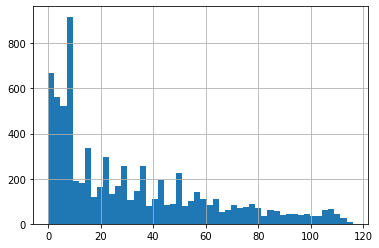

In [82]:
odsTime['days_request_entered_in_advance'].hist(bins=50)

***Alloted Time and Time Taken Stats for odsTime***

In [83]:
odsTime[['allotted_time', 'actual_time', 'days_request_entered_in_advance']].describe()
# ods[['allotted_time', 'actual_time_taken']].agg(['mean', 'median', 'std'])

,allotted_time,actual_time,days_request_entered_in_advance
count,7566.000000,7566.000000,7566.000000
mean,135.615385,85.821306,31.273857
std,112.972700,55.420069,29.473899
min,0.000000,0.000000,0.000000
25%,100.000000,48.000000,7.000000
50%,113.000000,76.000000,21.000000
75%,150.000000,111.000000,50.000000
max,5070.000000,642.000000,116.000000


Looks look at the distribution of these stats

<AxesSubplot:ylabel='Density'>

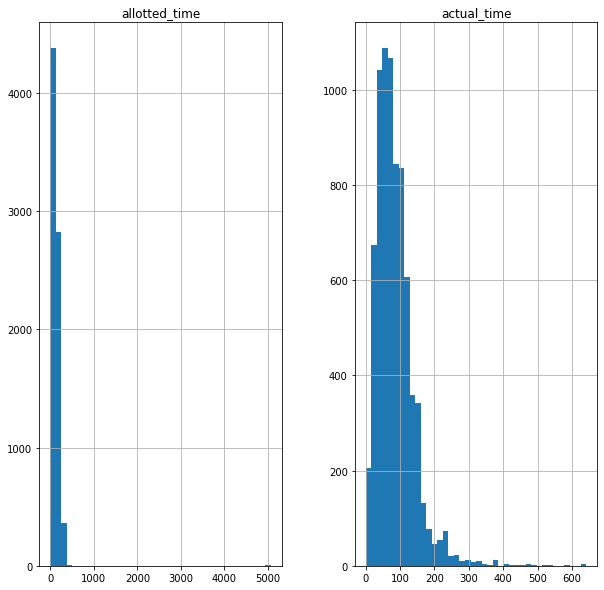

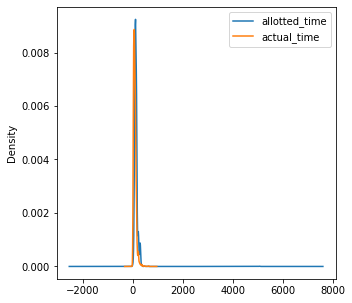

In [84]:
odsTime[['allotted_time', 'actual_time']].hist(figsize=(10,10), bins=40)
odsTime[['allotted_time', 'actual_time']].plot(kind='kde', figsize=(5, 5))

***The top two graphs display the histograms for allotted_time and actual_time_taken. The graph below it, displays the kernel densisty estimation(KDE), which (at least a high-level explanation) shows the shapes of the distributions***

Right away, we can see from the distribution and that the distribution of these two features have signficant right tails, especially allotted_time. We can see from the 'describe' method that the max time alloted to a student was 5070 minutes. What class was this for, how much time did they actually use, and should they have been alloted that much time?

In [85]:
odsTime.loc[odsTime['allotted_time'] == 5070, ['subject', 'proctorLastName', 'exam_start', 'exam_finish', 'allotted_time']]

,subject,proctorLastName,exam_start,exam_finish,allotted_time
4536,ENGR,Vanslambrouck,2020-01-28 18:30:00,2020-01-28 07:00:00,5070.0
5541,ENGR,Vanslambrouck,2020-02-18 18:30:00,2020-02-18 07:00:00,5070.0
6430,ENGR,Vanslambrouck,2020-03-10 18:30:00,2020-03-10 07:00:00,5070.0


We can see that this is clearly an an error. No student should've been alloted 84.5 hours to do an exam. How much time did they actually take?

In [86]:
odsTime.loc[odsTime['allotted_time'] == 5070, ['subject', 'section', 'proctorLastName', 'actual_start', 'actual_finish',
                                    'actual_time']]

,subject,section,proctorLastName,actual_start,actual_finish,actual_time
4536,ENGR,1,Vanslambrouck,2020-01-28 18:30:00,2020-01-28 19:19:00,49.0
5541,ENGR,1,Vanslambrouck,2020-02-18 18:30:00,2020-02-18 19:50:00,80.0
6430,ENGR,1,Vanslambrouck,2020-03-10 18:29:00,2020-03-10 19:02:00,33.0


It is is possible that the instructor accidentally added too much time to the testing agreement, or there was an error on the part of the testing coordinator. All three  happened with the same subject, ENGR, and in the same semester. Are there anymore ENGR classes that we can compare them to?

In [87]:
odsTime.loc[(odsTime['subject'] == 'ENGR') & (odsTime['exam_start'] > '2020-01-01') &
        (odsTime['exam_finish'] < '2020-03-13'), ['allotted_time', 'section']]

,allotted_time,section
4525,105.0,5
4526,140.0,6
4527,105.0,7
4528,105.0,14
4529,105.0,3
4530,105.0,3
4531,140.0,4
4532,140.0,6
4533,105.0,8
4534,140.0,15


***Since no section matches our outliers, we can just drop this from the dataframe, since this affects the distribution of our data set, and we do not have a time value that we can compare to***

In [88]:
drop = odsTime[odsTime['allotted_time']==5070].index
odsTime.drop(index=drop, inplace=True)

*Let's look at our distribution, now*

In [89]:
odsTime[['allotted_time', 'actual_time']].describe()

,allotted_time,actual_time
count,7563.000000,7563.000000
mean,133.658072,85.833928
std,55.719415,55.426074
min,0.000000,0.000000
25%,100.000000,48.000000
50%,113.000000,76.000000
75%,150.000000,111.000000
max,600.000000,642.000000


<AxesSubplot:ylabel='Density'>

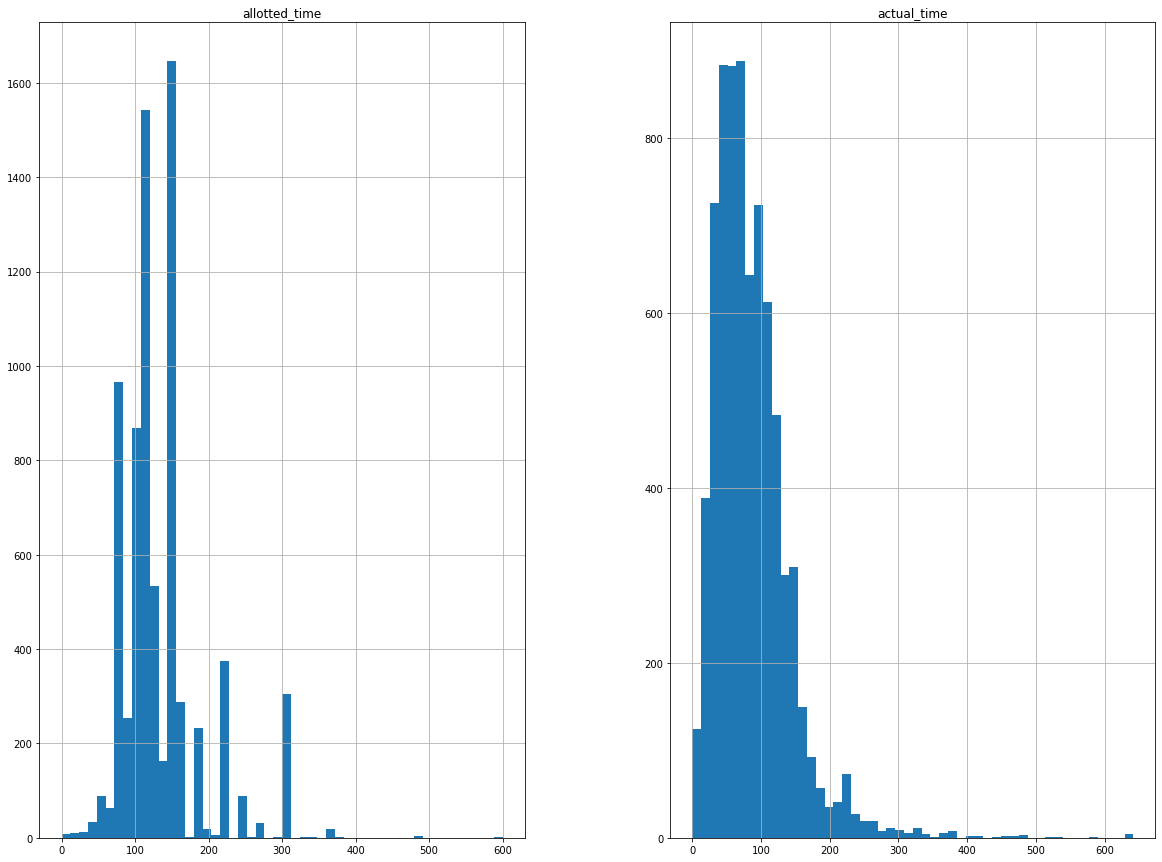

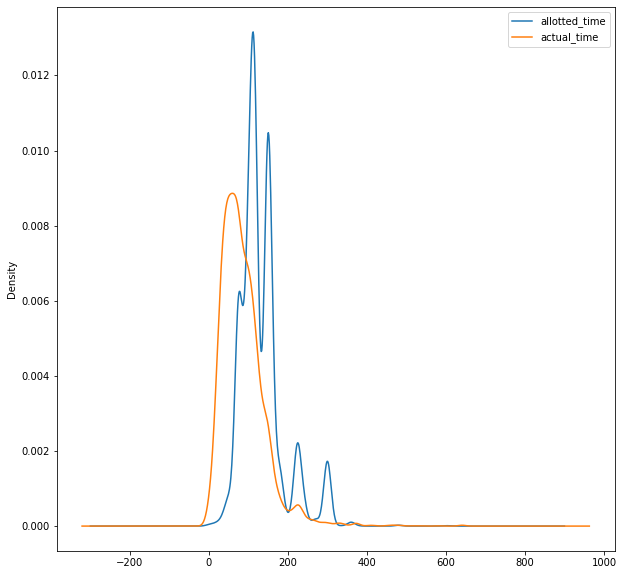

In [90]:
odsTime[['allotted_time', 'actual_time']].hist(figsize=(20,15), bins=50)
odsTime[['allotted_time', 'actual_time']].plot(kind='kde', figsize=(10,10))

**Now we have a better idea of what our data looks like**

### ***Are there any other significant outliers?***

<AxesSubplot:>

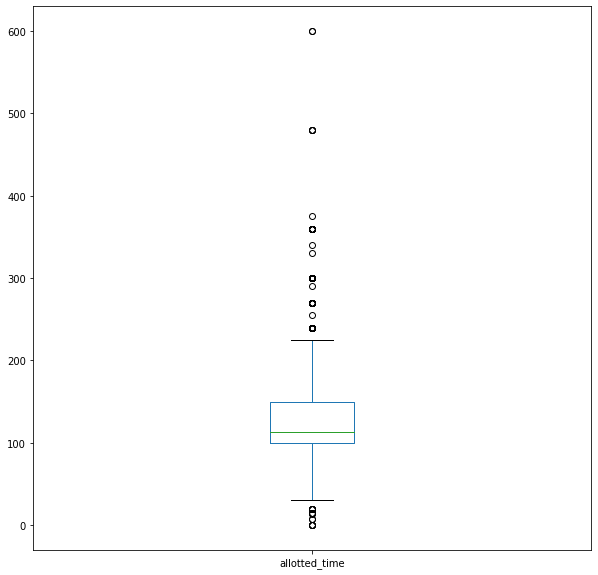

In [91]:
odsTime['allotted_time'].plot(kind='box', figsize=(10,10))

<AxesSubplot:>

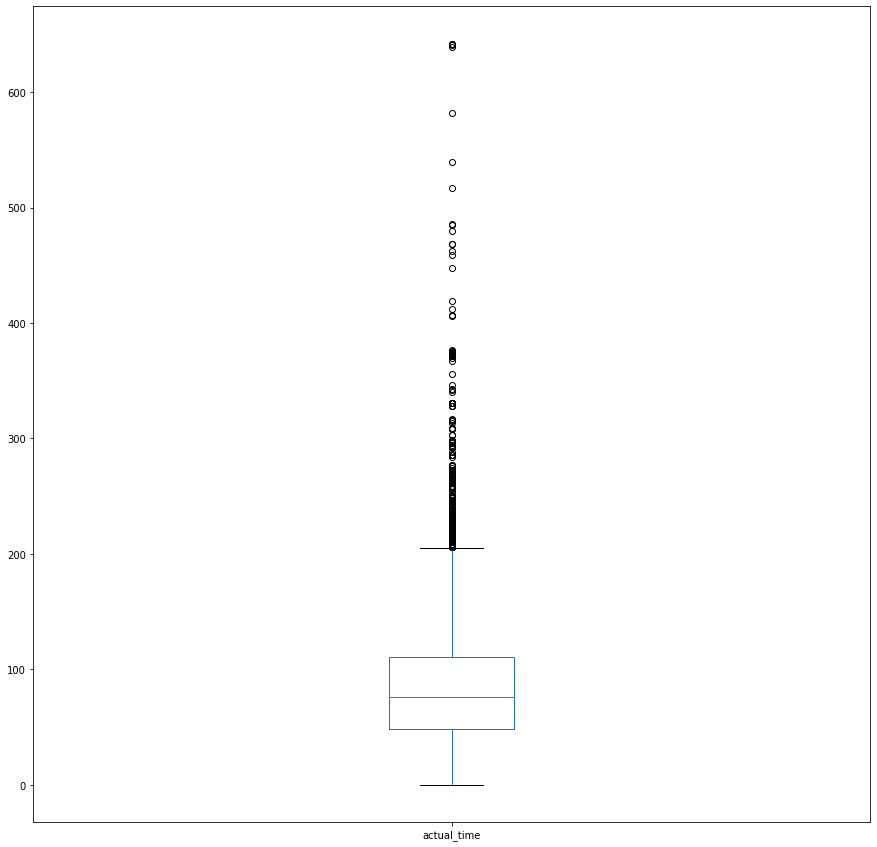

In [92]:
odsTime['actual_time'].plot(kind='box', figsize=(15, 15))

**Yes, both of our datasets have significant outliers. We need to figure out why, and what to do with them**

First, lets find the IQR

In [93]:
IQR_alloted = (odsTime['allotted_time'].quantile(0.75)) - (odsTime['allotted_time'].quantile(0.25))
IQR_actual = (odsTime['actual_time'].quantile(0.75)) - (odsTime['actual_time'].quantile(0.25))
print(f"IQR (allotted_time): {IQR_alloted}\nIQR (actual time): {IQR_actual}")

IQR (allotted_time): 50.0
IQR (actual time): 63.0


Now, let's calculate the low end

In [94]:
min_val_allt = odsTime['allotted_time'].quantile(0.25) - IQR_alloted * 1.5
min_val_act = odsTime['actual_time'].quantile(0.25) - IQR_actual *1.5
max_val_allt = odsTime['allotted_time'].quantile(0.75) + IQR_alloted *1.5
max_val_act = odsTime['actual_time'].quantile(0.75) + IQR_alloted *1.5

In [95]:
# allotted_time
print(min_val_allt)
print(max_val_allt)

25.0
225.0


In [96]:
# actual_time_taken
print(min_val_act)
print(max_val_act)

-46.5
186.0


#### ***What records were below the min value for allotted_time?***

In [97]:
odsTime.loc[odsTime['allotted_time'] < min_val_allt, ['subject', 'section','allotted_time','actual_time', 'proctorLastName', 'exam_start', 'exam_finish']]

,subject,section,allotted_time,actual_time,proctorLastName,exam_start,exam_finish
1212,HY,28,15.0,30.0,Vanslambrouck,2019-10-02 15:45:00,2019-10-02 16:00:00
2025,HY,28,15.0,20.0,Vanslambrouck,2019-10-21 14:00:00,2019-10-21 14:15:00
2078,HY,28,20.0,22.0,Vanslambrouck,2019-10-22 14:00:00,2019-10-22 14:20:00
2787,CD,1,20.0,39.0,Vanslambrouck,2019-11-07 14:00:00,2019-11-07 14:20:00
2791,EC,4,0.0,32.0,Vanslambrouck,2019-11-07 14:00:00,2019-11-07 14:00:00
2860,HY,28,15.0,21.0,Bulls,2019-11-08 14:15:00,2019-11-08 14:30:00
3519,GBA,7,0.0,147.0,Unspecified,2019-11-22 13:00:00,2019-11-22 13:00:00
4682,ARH,1,8.0,8.0,Bulls,2020-02-03 10:30:00,2020-02-03 10:38:00
4683,PY,8,0.0,32.0,Unspecified,2020-02-03 10:30:00,2020-02-03 10:30:00
4689,FI,321,0.0,67.0,Vanslambrouck,2020-02-03 13:45:00,2020-02-03 13:45:00


***Some quizzes are only 15 minutes long. With students varying on levels of extra time, it isn't abnomral to see 15-30 mins alloted for test at ODS. Therefore, we should not touch those rows***

Let's group exams by the class and section to see if there is a comparable time that we can impute with

In [98]:
df_1= odsTime[(odsTime['subject']=='GBA') & (odsTime['section']==7) & (odsTime['allotted_time']!=0.0) | (odsTime['subject']=='BSC') & (odsTime['section']==2) & 
              (odsTime['allotted_time']!=0.0) | (odsTime['subject']=='EC') & (odsTime['section']==4) & (odsTime['allotted_time']!=0.0) | 
              (odsTime['subject']=='PY') & (odsTime['section']== 8) & (odsTime['allotted_time']!= 0.0)|(odsTime['subject']=='FI') & (odsTime['section']==321) & (odsTime['allotted_time']!=0.0)]


df_1.groupby(['subject', 'section'])[['allotted_time']].mean()

,,allotted_time
subject,section,
BSC,2,116.485714
EC,4,136.047619
FI,321,154.238095
GBA,7,150.000000
PY,8,106.950000


In [99]:
odsTime[(odsTime['subject']=='GBA') & (odsTime['section']==7) & (odsTime['allotted_time']==0.0) | (odsTime['subject']=='BSC') & (odsTime['section']==2) & 
              (odsTime['allotted_time']==0.0) | (odsTime['subject']=='EC') & (odsTime['section']==4) & (odsTime['allotted_time']==0.0) | 
              (odsTime['subject']=='PY') & (odsTime['section']== 8) & (odsTime['allotted_time']== 0.0)|(odsTime['subject']=='FI') & (odsTime['section']==321) & (odsTime['allotted_time']==0.0)]

,subject,section,proctorLastName,locationName,fileUploaded,received_as_paper_copy,rescheduled,breaks_during_exams,extra_time_1.50x,extra_time_2.00x,...,date_request_entered,exam_start,exam_finish,days_request_entered_in_advance,actual_start,actual_finish,day_of_week_n,nameOfDay,allotted_time,actual_time
2791,EC,4,Vanslambrouck,11,Yes,Yes,0.0,No,Yes,No,...,2019-11-01 11:59:00,2019-11-07 14:00:00,2019-11-07 14:00:00,6.0,2019-11-07 14:00:00,2019-11-07 14:32:00,3,Thursday,0.0,32.0
3519,GBA,7,Unspecified,Virtual Room(Finals only),No,No,0.0,No,Yes,No,...,2019-09-13 12:57:00,2019-11-22 13:00:00,2019-11-22 13:00:00,70.0,2019-11-22 13:01:00,2019-11-22 15:28:00,4,Friday,0.0,147.0
4683,PY,8,Unspecified,Virtual Room(Finals only),Yes,No,1.0,Yes,Yes,No,...,2020-01-21 12:21:00,2020-02-03 10:30:00,2020-02-03 10:30:00,13.0,2020-02-03 10:31:00,2020-02-03 11:03:00,0,Monday,0.0,32.0
4689,FI,321,Vanslambrouck,01,Yes,No,0.0,No,Yes,No,...,2020-01-30 14:22:00,2020-02-03 13:45:00,2020-02-03 13:45:00,4.0,2020-02-03 13:45:00,2020-02-03 14:52:00,0,Monday,0.0,67.0
6102,BSC,2,Unspecified,Virtual Room(Finals only),No,No,0.0,No,Yes,No,...,2020-01-09 15:34:00,2020-03-03 18:10:00,2020-03-03 18:10:00,54.0,2020-03-03 18:12:00,2020-03-03 19:22:00,1,Tuesday,0.0,70.0


In [100]:
# Impute the numbers with the corresponding means for each subject and section
odsTime.loc[2791, ['allotted_time']]=136.0
odsTime.loc[3519, ['allotted_time']]=150.0
odsTime.loc[4683, ['allotted_time']]=107.0
odsTime.loc[4689, ['allotted_time']]=154.0
odsTime.loc[6102, ['allotted_time']]=117.0

Let's look at our distribution now

count    7563.000000
mean      133.745868
std        55.615240
min         8.000000
25%       100.000000
50%       113.000000
75%       150.000000
max       600.000000
Name: allotted_time, dtype: float64
AxesSubplot(0.125,0.125;0.775x0.755)


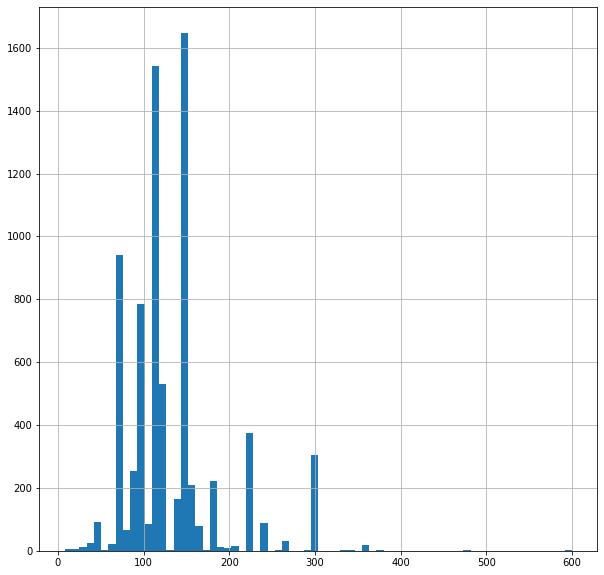

In [101]:
print(odsTime['allotted_time'].describe())
print(odsTime['allotted_time'].hist(figsize=(10,10), bins=70))

#### ***What records were above the max value for allotted_time?***

In [102]:
odsTime.loc[odsTime['allotted_time'] > max_val_allt, ['subject', 'exam_start', 'extra_time_1.50x', 'extra_time_2.00x', 'allotted_time']].sort_values(by='allotted_time', ascending=False)

,subject,exam_start,extra_time_1.50x,extra_time_2.00x,allotted_time
6908,OM,2020-12-09 12:15:00,No,Yes,600.0
3950,HY,2019-12-10 13:00:00,No,Yes,600.0
3455,GBA,2019-11-22 08:05:00,No,Yes,480.0
3469,GBA,2019-11-22 09:10:00,No,Yes,480.0
3470,GBA,2019-11-22 09:10:00,No,Yes,480.0
...,...,...,...,...,...
3912,CS,2019-12-10 10:00:00,No,Yes,240.0
3863,CTD,2019-12-10 08:00:00,No,Yes,240.0
3521,GBA,2019-11-22 13:00:00,No,Yes,240.0
3311,CHE,2019-11-20 14:05:00,No,Yes,240.0


### ***A note about exam times***

*According to accommodation specialists, and testing staff, students generally receive either 1.50x or 2.00x. One student did have 3.00x but the time was changed to 2.00x and that student no longer attends the university. Generally speaking, the most time alloted for a student should be during final exams. Final Exams are given in blocks of 2.5 hours (1.5x:225, 2.0x:300). The exception to this are for GBA final exams, which are 4 hours long (1.5x:360, 2.0x:480).  Some classes, especially those in engineering, receive as much as 3 hours for a normal exam (normal class time); thus, a student with extra time could potentially get 360 minutes for a normal exam.* 

*We need to be careful about what we keep and what we drop from out dataset. The truth is, we will have true outliers in this dataset*

In [103]:
# Filter for instances where time was greater than 300 and the subject was not GBA
odsTime.loc[(odsTime['allotted_time'] > 225) & (odsTime['subject']!='GBA'),
            ['subject', 'section','exam_start', 'allotted_time']].sort_values(by='allotted_time', ascending=False)

,subject,section,exam_start,allotted_time
3950,HY,28,2019-12-10 13:00:00,600.0
6908,OM,320,2020-12-09 12:15:00,600.0
4407,MUS,2,2019-12-13 10:00:00,375.0
4182,RHM,1,2019-12-11 15:00:00,360.0
2711,MTE,2,2019-11-06 13:45:00,360.0
...,...,...,...,...
2918,CE,2,2019-11-12 14:00:00,240.0
5755,CS,910,2020-02-25 15:30:00,240.0
2951,CEE,320,2019-11-12 17:30:00,240.0
5642,AEM,2,2020-02-20 18:00:00,240.0


In [104]:
# Filter for instances where time was greater than 300 and the subject was not GBA
odsTime.loc[(odsTime['allotted_time'] > 225) & (odsTime['subject']!='GBA'),
            ['subject', 'exam_start', 'section', 'allotted_time']].sort_values(by='allotted_time', ascending=False).mode()

,subject,exam_start,section,allotted_time
0,CE,2019-12-11 08:00:00,1,300.0


1. For HY 28, the student should've been awarded 300 minutes, not 600. This is likely due to the instructor preemptively adding in the extra time themselves when entering the time into the portal. 
2. For MUS 2, the student should've been awarded 225 minutes, not 375 minues. Again, this is likely due to instructor error
3. OM 320 should have a time of 300 minutes, not 600
4. For MC 910, the course is online and it is a basic speech course. No alternative testing agreement found, but after speaking with ODS staff, it is extremely likely the instructor input the wrong time for the student.

In [105]:
odsTime.loc[3950, ['allotted_time']] = 300
odsTime.loc[4407, ['allotted_time']] = 225
odsTime.loc[6908, ['allotted_time']] = 300
odsTime.loc[1211, ['allotted_time']] = 180
# odsTime.loc[(odsTime['subject']=='MC') & (odsTime['allotted_time'] > 180)]

<AxesSubplot:>

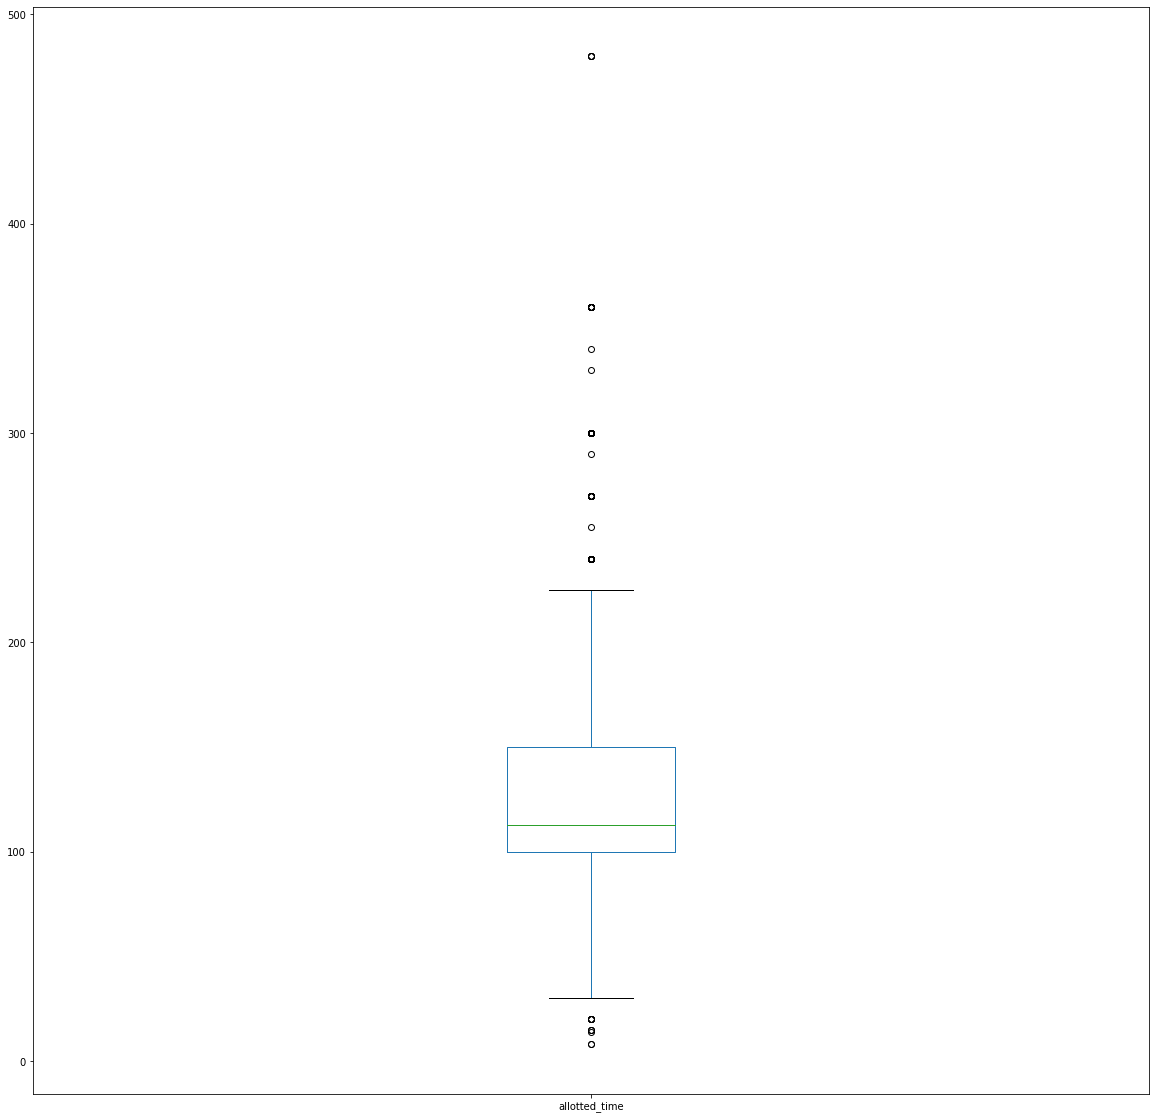

In [106]:
odsTime['allotted_time'].plot(kind='box', figsize=(20, 20))

In [107]:
# x = odsTime.loc[odsTime['subject']=='MC', ['subject', 'section', 'startDateTime','extra_time_1.50x', 'extra_time_2.00x', 'allotted_time']]

In [109]:
odsTime

,subject,section,proctorLastName,locationName,fileUploaded,received_as_paper_copy,rescheduled,breaks_during_exams,extra_time_1.50x,extra_time_2.00x,...,date_request_entered,exam_start,exam_finish,days_request_entered_in_advance,actual_start,actual_finish,day_of_week_n,nameOfDay,allotted_time,actual_time
0,CHE,1,Vanslambrouck,11,No,No,0.0,No,No,No,...,2019-08-27 18:30:00,2019-08-29 13:25:00,2019-08-29 14:40:00,2.0,2019-08-29 13:25:00,2019-08-29 13:37:00,3,Thursday,75.0,12.0
1,CHE,1,Unspecified,40,Yes,No,1.0,No,Yes,No,...,2019-08-27 12:33:00,2019-08-29 15:00:00,2019-08-29 16:53:00,2.0,2019-08-29 14:55:00,2019-08-29 15:16:00,3,Thursday,113.0,21.0
2,CHE,1,Vanslambrouck,39,Yes,No,0.0,No,No,Yes,...,2019-08-21 18:39:00,2019-08-29 17:00:00,2019-08-29 19:30:00,8.0,2019-08-29 16:58:00,2019-08-29 17:16:00,3,Thursday,150.0,18.0
3,AC,15,Bulls,40,Yes,No,0.0,No,No,Yes,...,2019-08-26 18:19:00,2019-08-30 08:45:00,2019-08-30 09:25:00,4.0,2019-08-30 08:43:00,2019-08-30 08:49:00,4,Friday,40.0,6.0
4,AC,26,Bulls,39,Yes,No,0.0,No,No,Yes,...,2019-08-26 18:19:00,2019-08-30 11:00:00,2019-08-30 11:40:00,4.0,2019-08-30 11:01:00,2019-08-30 11:40:00,4,Friday,40.0,39.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7561,CE,1,Bulls,04,Yes,Yes,0.0,No,No,Yes,...,2021-04-14 13:44:00,2021-04-30 11:30:00,2021-04-30 16:30:00,16.0,2021-04-30 11:32:00,2021-04-30 16:28:00,4,Friday,300.0,296.0
7562,PY,1,Bulls,13,No,Yes,0.0,No,Yes,No,...,2021-04-19 17:42:00,2021-04-30 11:30:00,2021-04-30 15:15:00,11.0,2021-04-30 11:32:00,2021-04-30 12:07:00,4,Friday,225.0,35.0
7563,PY,1,Bulls,10,No,Yes,0.0,No,Yes,No,...,2021-04-19 01:16:00,2021-04-30 11:30:00,2021-04-30 15:15:00,11.0,2021-04-30 11:29:00,2021-04-30 12:08:00,4,Friday,225.0,39.0
7564,CE,1,Bulls,11,Yes,Yes,0.0,No,Yes,No,...,2021-04-26 13:11:00,2021-04-30 11:35:00,2021-04-30 15:20:00,4.0,2021-04-30 11:34:00,2021-04-30 13:50:00,4,Friday,225.0,136.0


In [111]:
odsTime['exam_start'].dt.time

0       13:25:00
1       15:00:00
2       17:00:00
3       08:45:00
4       11:00:00
          ...   
7561    11:30:00
7562    11:30:00
7563    11:30:00
7564    11:35:00
7565    11:35:00
Name: exam_start, Length: 7563, dtype: object

In [158]:
odsTime

,subject,section,proctorLastName,locationName,fileUploaded,received_as_paper_copy,rescheduled,breaks_during_exams,extra_time_1.50x,extra_time_2.00x,...,exam_start_time,exam_finish,exam_finish_time,days_request_entered_in_advance,actual_start,actual_finish,day_of_week_n,nameOfDay,allotted_time,actual_time
0,CHE,1,Vanslambrouck,11,No,No,0.0,No,No,No,...,13:25:00,2019-08-29 14:40:00,14:40:00,2.0,2019-08-29 13:25:00,2019-08-29 13:37:00,3,Thursday,75.0,12.0
1,CHE,1,Unspecified,40,Yes,No,1.0,No,Yes,No,...,15:00:00,2019-08-29 16:53:00,16:53:00,2.0,2019-08-29 14:55:00,2019-08-29 15:16:00,3,Thursday,113.0,21.0
2,CHE,1,Vanslambrouck,39,Yes,No,0.0,No,No,Yes,...,17:00:00,2019-08-29 19:30:00,19:30:00,8.0,2019-08-29 16:58:00,2019-08-29 17:16:00,3,Thursday,150.0,18.0
3,AC,15,Bulls,40,Yes,No,0.0,No,No,Yes,...,08:45:00,2019-08-30 09:25:00,09:25:00,4.0,2019-08-30 08:43:00,2019-08-30 08:49:00,4,Friday,40.0,6.0
4,AC,26,Bulls,39,Yes,No,0.0,No,No,Yes,...,11:00:00,2019-08-30 11:40:00,11:40:00,4.0,2019-08-30 11:01:00,2019-08-30 11:40:00,4,Friday,40.0,39.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7561,CE,1,Bulls,04,Yes,Yes,0.0,No,No,Yes,...,11:30:00,2021-04-30 16:30:00,16:30:00,16.0,2021-04-30 11:32:00,2021-04-30 16:28:00,4,Friday,300.0,296.0
7562,PY,1,Bulls,13,No,Yes,0.0,No,Yes,No,...,11:30:00,2021-04-30 15:15:00,15:15:00,11.0,2021-04-30 11:32:00,2021-04-30 12:07:00,4,Friday,225.0,35.0
7563,PY,1,Bulls,10,No,Yes,0.0,No,Yes,No,...,11:30:00,2021-04-30 15:15:00,15:15:00,11.0,2021-04-30 11:29:00,2021-04-30 12:08:00,4,Friday,225.0,39.0
7564,CE,1,Bulls,11,Yes,Yes,0.0,No,Yes,No,...,11:35:00,2021-04-30 15:20:00,15:20:00,4.0,2021-04-30 11:34:00,2021-04-30 13:50:00,4,Friday,225.0,136.0
